In [1]:
import conllu


In [8]:
with open('../Dataset/UD_French-Sequoia/fr_sequoia-ud-test.conllu') as fp:
    for line in fp.readlines()[:10]:
        print(line, end='')

# global.columns = ID FORM LEMMA UPOS XPOS FEATS HEAD DEPREL DEPS MISC
# sent_id = Europar.550_00011
# text = cela signifie que leur consommation énergétique, qui représente actuellement 10% de la consommation énergétique moyenne de l'UE, enregistrera une forte augmentation à mesure qu'ils exigeront des commodités élémentaires comme l'eau chaude et, peut-être même, l'air conditionné, des moyens de transport et la modernisation de leurs industries.
1	cela	cela	PRON	_	Number=Sing|PronType=Dem	2	nsubj	_	_
2	signifie	signifier	VERB	_	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	_	_
3	que	que	SCONJ	_	_	22	mark	_	_
4	leur	son	DET	_	Number=Sing|Poss=Yes	5	det	_	_
5	consommation	consommation	NOUN	_	Gender=Fem|Number=Sing	22	nsubj	_	_
6	énergétique	énergétique	ADJ	_	Number=Sing	5	amod	_	SpaceAfter=No
7	,	,	PUNCT	_	_	5	punct	_	_


In [14]:
with open('../Dataset/UD_French-Sequoia/fr_sequoia-ud-train.conllu') as fp:
    data = conllu.parse(fp.read())

In [19]:
data[100].to_tree()

TokenTree<token={id=8, form=entré}, children=[...]>

In [48]:
def load_conllu(filename):
    with open(filename) as fp:
        data = conllu.parse(fp.read())
        sentences = [[token['form'] for token in sentence] for sentence in data]
        taggings = [[token['upos'] for token in sentence] for sentence in data]
    return sentences, taggings

train_sentences, train_taggings = load_conllu('../Dataset/UD_French-Sequoia/fr_sequoia-ud-train.conllu')
valid_sentences, valid_taggings = load_conllu('../Dataset/UD_French-Sequoia/fr_sequoia-ud-dev.conllu')
test_sentences, test_taggings = load_conllu('../Dataset/UD_French-Sequoia/fr_sequoia-ud-test.conllu')

print(train_sentences[10])
print(train_taggings[10])

['"', 'Tout', 'simplement', '"', ',', 'a', 'précisé', 'Roger', 'Thiriot', ',', '"', 'parce', 'que', "l'", 'histoire', 'du', 'de', 'le', 'travail', 'industriel', 'est', ',', 'ici', ',', 'une', 'longue', 'et', 'vieille', 'histoire', '.']
['PUNCT', 'ADV', 'ADV', 'PUNCT', 'PUNCT', 'AUX', 'VERB', 'PROPN', 'PROPN', 'PUNCT', 'PUNCT', 'SCONJ', 'SCONJ', 'DET', 'NOUN', '_', 'ADP', 'DET', 'NOUN', 'ADJ', 'AUX', 'PUNCT', 'ADV', 'PUNCT', 'DET', 'ADJ', 'CCONJ', 'ADJ', 'NOUN', 'PUNCT']


In [37]:
len(train_sentences)

14450

In [38]:
# use a defaultdict to count the number of occurrences of each tag
import collections
tagset = collections.defaultdict(int)

for tagging in train_taggings:
    for tag in tagging:
        tagset[tag] += 1

print('number of different tags:', len(tagset))

# print count and tag sorted by decreasing count
for tag, count in sorted(tagset.items(), reverse=True, key=lambda x: x[1]):
    print(count, tag)

number of different tags: 17
66434 NOUN
56470 ADP
54148 DET
39010 PUNCT
28312 VERB
25196 PROPN
20964 ADJ
15697 PRON
12801 ADV
11465 AUX
9689 _
9297 CCONJ
9242 NUM
2601 SCONJ
2234 X
618 SYM
69 INTJ


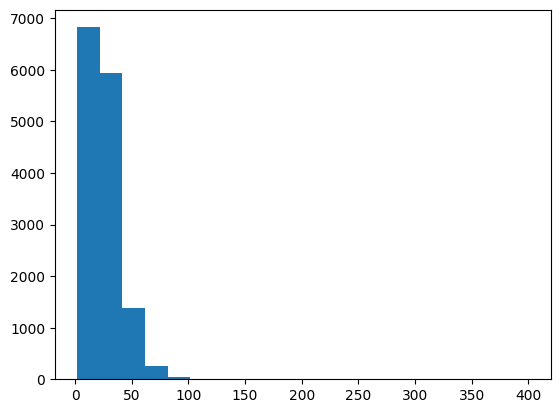

max length: 400


In [39]:
from matplotlib import pyplot as plt

# compute and show histogram for sentence length
plt.hist([len(sentence) for sentence in train_sentences], 20)
plt.show()

# compute max sentence length
print('max length:', max([len(sentence) for sentence in train_sentences]))

In [40]:
# import relevant classes for pretrained tokenizer and model
from transformers import AutoTokenizer, AutoModel

In [42]:
from transformers import CamembertModel, CamembertTokenizer

# You can replace "camembert-base" with any other model from the table, e.g. "camembert/camembert-large".
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
camembert = CamembertModel.from_pretrained("camembert-base")

Downloading:   0%|          | 0.00/811k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertModel: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [43]:
tokenizer.tokenize("cela signifie que leur consommation énergétique, qui représente actuellement 10% de la consommation énergétique moyenne de l'UE, enregistrera une forte augmentation à mesure qu'ils exigeront des commodités élémentaires comme l'eau chaude et, peut-être même, l'air conditionné, des moyens de transport et la modernisation de leurs industries.")



['▁cela',
 '▁signifie',
 '▁que',
 '▁leur',
 '▁consommation',
 '▁énergétique',
 ',',
 '▁qui',
 '▁représente',
 '▁actuellement',
 '▁10%',
 '▁de',
 '▁la',
 '▁consommation',
 '▁énergétique',
 '▁moyenne',
 '▁de',
 '▁l',
 "'",
 'UE',
 ',',
 '▁enregistrer',
 'a',
 '▁une',
 '▁forte',
 '▁augmentation',
 '▁à',
 '▁mesure',
 '▁qu',
 "'",
 'ils',
 '▁exiger',
 'ont',
 '▁des',
 '▁commodités',
 '▁élémentaires',
 '▁comme',
 '▁l',
 "'",
 'eau',
 '▁chaude',
 '▁et',
 ',',
 '▁peut',
 '-',
 'être',
 '▁même',
 ',',
 '▁l',
 "'",
 'air',
 '▁conditionné',
 ',',
 '▁des',
 '▁moyens',
 '▁de',
 '▁transport',
 '▁et',
 '▁la',
 '▁modernisation',
 '▁de',
 '▁leurs',
 '▁industries',
 '.']

In [50]:
import re

def align_tokenizations(sentences, taggings):
    bert_tokenized_sentences = []
    aligned_taggings = []

    for sentence, tagging in zip(sentences, taggings):
        # first generate BERT-tokenization
        bert_tokenized_sentence = tokenizer.tokenize(' '.join(sentence))

        aligned_tagging = []
        current_word = ''
        index = 0 # index of current word in sentence and tagging
        for token in bert_tokenized_sentence:
            current_word += re.sub(r'^##', '', token) # recompose word with subtoken
            sentence[index] = sentence[index].replace('\xad', '') # fix bug in data

            # note that some word factors correspond to unknown words in BERT
#             assert token == '[UNK]' or sentence[index].startswith(current_word)

            if token == '[UNK]' or sentence[index] == current_word: # if we completed a word
                current_word = ''
                aligned_tagging.append(tagging[index])
                index += 1
            else: # otherwise insert padding
                aligned_tagging.append('<pad>')

        assert len(bert_tokenized_sentence) == len(aligned_tagging)

        bert_tokenized_sentences.append(bert_tokenized_sentence)
        aligned_taggings.append(aligned_tagging)

    return bert_tokenized_sentences, aligned_taggings

train_bert_tokenized_sentences, train_aligned_taggings = align_tokenizations(train_sentences, train_taggings)
valid_bert_tokenized_sentences, valid_aligned_taggings = align_tokenizations(valid_sentences, valid_taggings)
test_bert_tokenized_sentences, test_aligned_taggings = align_tokenizations(test_sentences, test_taggings)

print(train_bert_tokenized_sentences[42])
print(train_aligned_taggings[42])

['▁L', "'", '▁équipe', '▁B', '▁', ',', '▁chez', '▁les', '▁seniors', '▁', ',', '▁évoluer', 'a', '▁à', '▁partir', '▁de', '▁15', '▁h', '▁', ',', '▁sur', '▁la', '▁pelouse', '▁du', '▁de', '▁le', '▁terrain', '▁d', "'", '▁honneur', '▁', ',', '▁face', '▁à', '▁la', '▁formation', '▁de', '▁La', 'neu', 'ville', '▁', '.']
['<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


In [53]:
import torch
# device = torch.device('gpu' if torch.cuda.is_available else 'cpu')
device = torch.device('cpu')

import collections

label_vocab = collections.defaultdict(lambda: len(label_vocab))
label_vocab['<pad>'] = 0

def convert_to_ids(sentences, taggings):
    sentences_ids = []
    taggings_ids = []
    for sentence, tagging in zip(sentences, taggings):
        sentence_tensor = torch.tensor(tokenizer.convert_tokens_to_ids(['[CLS]'] + sentence + ['SEP'])).long()
        tagging_tensor = torch.tensor([0] + [label_vocab[tag] for tag in tagging] + [0]).long()

        sentences_ids.append(sentence_tensor.to(device))
        taggings_ids.append(tagging_tensor.to(device))
    return sentences_ids, taggings_ids

train_sentences_ids, train_taggings_ids = convert_to_ids(train_bert_tokenized_sentences, train_aligned_taggings)
valid_sentences_ids, valid_taggings_ids = convert_to_ids(valid_bert_tokenized_sentences, valid_aligned_taggings)
test_sentences_ids, test_taggings_ids = convert_to_ids(test_bert_tokenized_sentences, test_aligned_taggings)

print(train_sentences_ids[42])
print(train_taggings_ids[42])
print('num labels:', len(label_vocab))

tensor([    3,    71,    11,   815,   261,    21,     7,   222,    19,  8383,
           21,     7,  5120,    55,    15,   350,     8,   338,   616,    21,
            7,    32,    13, 12585,    25,     8,    16,   992,    18,    11,
         8515,    21,     7,   461,    15,    13,   513,     8,    61, 23921,
          998,    21,     9,     3])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
num labels: 1


In [54]:
from torch.utils.data import Dataset

class PosTaggingDataset(Dataset):
    def __init__(self, sentences, taggings):
        assert len(sentences) == len(taggings)
        self.sentences = sentences
        self.taggings = taggings

    def __getitem__(self, i):
        return self.sentences[i], self.taggings[i]

    def __len__(self):
        return len(self.sentences)

In [55]:
def collate_fn(items):
    max_len = max(len(item[0]) for item in items)

    sentences = torch.zeros((len(items), max_len), device=items[0][0].device).long().to(device)
    taggings = torch.zeros((len(items), max_len)).long().to(device)

    for i, (sentence, tagging) in enumerate(items):
        sentences[i][0:len(sentence)] = sentence
        taggings[i][0:len(tagging)] = tagging

    return sentences, taggings


x, y = collate_fn([[torch.tensor([1, 2, 3]), torch.tensor([4, 5, 6])], [torch.tensor([1, 2]), torch.tensor([3, 4])]])
print(x.shape, y.shape)

torch.Size([2, 3]) torch.Size([2, 3])


In [56]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(PosTaggingDataset(train_sentences_ids, train_taggings_ids), batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
valid_loader = DataLoader(PosTaggingDataset(valid_sentences_ids, valid_taggings_ids), batch_size=batch_size, collate_fn=collate_fn)
test_loader = DataLoader(PosTaggingDataset(test_sentences_ids, test_taggings_ids), batch_size=batch_size, collate_fn=collate_fn)

In [57]:
import torch.nn as nn
import torch.nn.functional as F

class RNNClassifier(nn.Module):
    def __init__(self, num_labels, embed_size=128, hidden_size=128):
        super().__init__()
        self.embedding = nn.Embedding(tokenizer.vocab_size, embed_size, padding_idx=tokenizer.pad_token_id)
        self.rnn = nn.GRU(embed_size, hidden_size, num_layers=1, bidirectional=True, batch_first=True)
        self.decision = nn.Linear(1 * 2 * hidden_size, num_labels) # size output by GRU is number of layers * number of directions * hidden size
        self.to(device)
  
    def forward(self, sentences):
        embed_rep = self.embedding(sentences)
        word_rep, sentence_rep = self.rnn(embed_rep)
        return self.decision(F.dropout(F.gelu(word_rep), 0.3))

# check that model works on an arbitrary batch that contains two sentences of length 3
rnn_model = RNNClassifier(len(label_vocab))
with torch.no_grad():
    y = rnn_model(torch.tensor([[0, 1, 2], [3, 4, 5]]).to(device))

# the expected shape is (batch size, max sentence length, number of labels)
print(y.shape)

torch.Size([2, 3, 1])


In [65]:
def perf(model, loader):
    criterion = nn.CrossEntropyLoss()
    model.eval() # do not apply training-specific steps such as dropout
    total_loss = correct = num_loss = num_perf = 0
    for x, y in loader:
        with torch.no_grad(): # no need to store computation graph for gradients
          # perform inference and compute loss
            y_scores = model(x)
            loss = criterion(y_scores.view(-1, len(label_vocab)), y.view(-1)) # requires tensors of shape (num-instances, num-labels) and (num-instances)

            # gather loss statistics
            total_loss += loss.item()
            num_loss += 1

            # gather accuracy statistics
            y_pred = torch.max(y_scores, 2)[1] # compute highest-scoring tag
            mask = (y != 0) # ignore <pad> tags
            correct += torch.sum((y_pred == y) * mask) # compute number of correct predictions
            num_perf += torch.sum(mask).item()
            print(num_perf)
    return total_loss / num_loss, correct.item() / num_perf

# without training, accuracy should be a bit less than 2% (chance of getting a label correct)
# perf(rnn_model, valid_loader)

In [66]:
import torch.optim as optim

def fit(model, epochs):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-2)
    for epoch in range(epochs):
        model.train()
        total_loss = num = 0
        for x, y in train_loader:
            optimizer.zero_grad() # start accumulating gradients
            y_scores = model(x)
            loss = criterion(y_scores.view(-1, len(label_vocab)), y.view(-1))
            loss.backward() # compute gradients though computation graph
            optimizer.step() # modify model parameters
            total_loss += loss.item()
            num += 1
    print(1 + epoch, total_loss / num, *perf(model, valid_loader))

In [67]:
rnn_model = RNNClassifier(len(label_vocab))
fit(rnn_model, 5)

0
0
0
0
0
0
0


ZeroDivisionError: division by zero

In [68]:
class LinearProbeRandom(nn.Module):
    def __init__(self, num_labels):
        super().__init__()
        self.embedding = nn.Embedding(tokenizer.vocab_size, 768)
        self.probe = nn.Linear(768, num_labels)
        self.to(device)

    def parameters(self):
        return self.probe.parameters()
  
    def forward(self, sentences):
        with torch.no_grad(): # embeddings are not trained
            word_rep = self.embedding(sentences)
        return self.probe(word_rep)

# the model should return a tensor of shape (batch size, sequence length, number of labels)
random_model = LinearProbeRandom(len(label_vocab))
with torch.no_grad():
    y = random_model(torch.tensor([[0, 1, 2], [3, 4, 5]]).to(device))
print(y.shape)

torch.Size([2, 3, 1])


In [69]:
random_model = LinearProbeRandom(len(label_vocab))
fit(random_model, 5)

0
0
0
0
0
0
0


ZeroDivisionError: division by zero

In [72]:
class LinearProbeBert(nn.Module):
    def __init__(self, num_labels):
        super().__init__()
        self.camembert = CamembertModel.from_pretrained("camembert-base")
        self.probe = nn.Linear(self.camembert.config.hidden_size, num_labels)
        self.to(device)

    def parameters(self):
        return self.probe.parameters()
  
    def forward(self, sentences):
        with torch.no_grad(): # no training of BERT parameters
            word_rep, sentence_rep = self.camembert(sentences, return_dict=False)
        return self.probe(word_rep)

# the model should return a tensor of shape (batch size, sequence length, number of labels)
bert_model = LinearProbeBert(len(label_vocab))
y = bert_model(torch.tensor([[0, 1, 2], [3, 4, 5]]).to(device))
print(y.shape)

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertModel: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([2, 3, 1])


In [73]:
bert_model = LinearProbeBert(len(label_vocab))
fit(bert_model, 5)

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertModel: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
0
0
0
0
0
0


ZeroDivisionError: division by zero

In [ ]:
print('RNN representation (supervised)', *perf(rnn_model, test_loader))
print('RANDOM representation (unsupervised)', *perf(random_model, test_loader))
print('BERT representation (unsupervised)', *perf(bert_model, test_loader))